# Практическая работа №1
### Тема: Программная реализация многослойного персептрона
### Самарин Н.А. КИ21-17/1Б
### Вариант 24 = 6, 8, 5

Общая последовательность действий
1. Изучение принципа работы нейронной сети.
2. Проектирование и программная реализация базовой архитектуры
нейронной сети.
3. Тестирование разработанной программной реализации базовой
архитектуры нейронной сети.
4. Подбор гиперпараметров нейронной сети. При подборе
гиперпараметров нейронной сети предусмотреть подбор числа слоев,
нейронов на каждом слое и функций активации. Сравнить не менее трех
архитектур многослойного персептрона. Выбор архитектуры нейронной сети
осуществлять с помощью ошибки на валидационном множестве. После
выбора модели на валидационном множестве оценивается её ошибка на
тестирующем множестве.
5. Исследовать изменение ошибки обучения для получаемых
архитектур нейронных сетей в зависимости от выбранного алгоритма
оптимизации.
6. Дополнить архитектуру нейронно1 сетей блоками для batchнормализации и Dropout. Сравнить результаты обучения нейронной сети с их
использованием и без (скорость сходимости и получаемую точность). Для
Dropout подобрать оптимальное значение коэффициента Dropout.

In [2]:
from keras.datasets import fashion_mnist

In [3]:
from matplotlib import pyplot as plt


def plot_train_val_accuracy_loss(history):
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')

    plt.subplot(2, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')


## Подготовка данных

In [4]:
import tensorflow as tf
from keras import layers, models
from keras.callbacks import EarlyStopping
import numpy as np
import keras_tuner
# Разделение выборки
(train_image, train_label), (test_image, test_label) = fashion_mnist.load_data()
images = np.concatenate([train_image, test_image])
labels = np.concatenate([train_label, test_label])
indexes = [i for i in list(range(0, len(labels))) if labels[i] in [6, 8, 5]]

images = images[indexes]
labels = labels[indexes]
labels[labels == 6 ] = 0
labels[labels == 8 ] = 1
labels[labels == 5 ] = 2

split = int(0.6 * len(images))
val_split = int(0.2 * len(images))

train_images, val_images, test_images = images[:split], images[split:split+val_split], images[split+val_split:]
train_labels, val_labels, test_labels = labels[:split], labels[split:split+val_split], labels[split+val_split:]

Нормализация данных

In [5]:
train_images = train_images.astype('float32') / 255
val_images = val_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

Преобразование данных

In [6]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
val_images = val_images.reshape(val_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

## Реализация базовой архитектуры нейронной сети

In [7]:
# Определение модели
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Ранняя остановка
early_stopping = EarlyStopping(monitor='val_loss')

# Обучение модели
history_1 = model.fit(train_images, train_labels, epochs=50, validation_data=(val_images, val_labels), callbacks=[early_stopping], batch_size=32)
# Вывод ошибки обучения
print(history_1.history['loss'])



Epoch 1/50


394/394 [==============================] - 2s 3ms/step - loss: 0.3561 - accuracy: 0.9200 - val_loss: 0.2129 - val_accuracy: 0.9586
Epoch 2/50
394/394 [==============================] - 1s 3ms/step - loss: 0.1858 - accuracy: 0.9600 - val_loss: 0.1668 - val_accuracy: 0.9612
Epoch 3/50
394/394 [==============================] - 1s 3ms/step - loss: 0.1565 - accuracy: 0.9629 - val_loss: 0.1483 - val_accuracy: 0.9652
Epoch 4/50
394/394 [==============================] - 1s 3ms/step - loss: 0.1423 - accuracy: 0.9651 - val_loss: 0.1366 - val_accuracy: 0.9676
Epoch 5/50
394/394 [==============================] - 1s 3ms/step - loss: 0.1328 - accuracy: 0.9668 - val_loss: 0.1284 - val_accuracy: 0.9679
Epoch 6/50
394/394 [==============================] - 1s 3ms/step - loss: 0.1264 - accuracy: 0.9682 - val_loss: 0.1226 - val_accuracy: 0.9688
Epoch 7/50
394/394 [==============================] - 1s 3ms/step - loss: 0.1213 - accuracy: 0.9693 - val_loss: 0.1183 - val_accuracy: 0.9688
Ep

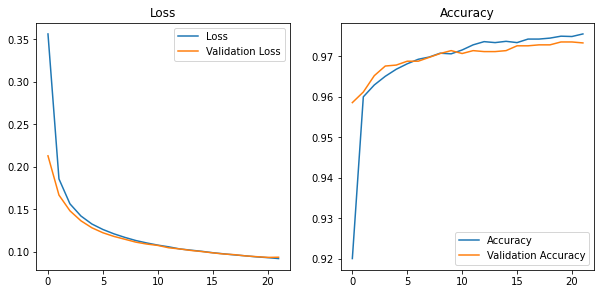

In [8]:
plot_train_val_accuracy_loss(history_1)

In [9]:
def create_model(optimizer='sgd', activation = 'sigmoid', hidden_layers=2, hidden_layers_neurons = (28, 28)):

    model = models.Sequential()

    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    print(hidden_layers)
    for i in range(hidden_layers):

        print(hidden_layers_neurons[i % len(hidden_layers_neurons)])
        model.add(layers.Dense(hidden_layers_neurons[len(hidden_layers_neurons) % hidden_layers], activation=activation))


    model.add(layers.Dense(3, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=
     ['accuracy'])
    return model

def GridSearch(build_fn, param_grid):
    print(param_grid)
    best_loss = 1
    best_model = None
    best_history = None
    best_params = {}
    params = {}
    best_for_layernums = []
    for hidden_layers in param_grid['hidden_layers']:
        best_for_layernum = None
        hidden_layers_neurons_prod = list(product(param_grid['hidden_layers_neurons'], repeat=hidden_layers))
        for hidden_layers_neurons in hidden_layers_neurons_prod:
            for activation in param_grid['activation']:
                for batch_size in param_grid['batch_size']:
                    for epochs in param_grid['epochs']:
                        model = build_fn(activation=activation, hidden_layers=hidden_layers, hidden_layers_neurons=hidden_layers_neurons)
                        history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(val_images, val_labels), callbacks=[early_stopping], batch_size=batch_size)
                        new_loss = history.history['loss'][-1]
                        if new_loss < best_loss:
                            best_loss = new_loss
                            best_model = model
                            best_history = history
                            best_params["hidden_layers"] = hidden_layers
                            best_params["hidden_layers_neurons"] = hidden_layers_neurons
                            best_params["activation"] = activation
                            best_params["batch_size"] = batch_size
                            best_params["epochs"] = epochs
                            best_for_layernum = (best_model, best_history, best_params)
                        elif best_for_layernum == None or new_loss < best_for_layernum[1].history['loss'][-1]:
                            params["hidden_layers"] = hidden_layers
                            params["hidden_layers_neurons"] = hidden_layers_neurons
                            params["activation"] = activation
                            params["batch_size"] = batch_size
                            params["epochs"] = epochs
                            best_for_layernum = (model, history, params)

        best_for_layernums.append(best_for_layernum)
    return best_model, best_history, best_params, best_for_layernums

In [10]:
from keras.activations import relu, sigmoid
from itertools import product
activations = [sigmoid, relu]
hidden_layers = [1, 2, 3]
hidden_layers_neurons = [4, 64]
param_grid = dict(hidden_layers=hidden_layers, hidden_layers_neurons=hidden_layers_neurons, activation=activations, batch_size = [32], epochs=[30])
best_model, best_history, best_params, best_for_layernums = GridSearch(create_model, param_grid)

{'hidden_layers': [1, 2, 3], 'hidden_layers_neurons': [4, 64], 'activation': [<function sigmoid at 0x000002872CDB7AF0>, <function relu at 0x000002872CDB75E0>], 'batch_size': [32], 'epochs': [30]}
1
4
Epoch 1/30
394/394 [==============================] - 1s 2ms/step - loss: 0.9925 - accuracy: 0.6008 - val_loss: 0.9105 - val_accuracy: 0.8007
Epoch 2/30
394/394 [==============================] - 1s 2ms/step - loss: 0.8066 - accuracy: 0.8680 - val_loss: 0.7041 - val_accuracy: 0.9181
Epoch 3/30
394/394 [==============================] - 1s 2ms/step - loss: 0.6155 - accuracy: 0.9323 - val_loss: 0.5410 - val_accuracy: 0.9469
Epoch 4/30
394/394 [==============================] - 1s 2ms/step - loss: 0.4819 - accuracy: 0.9480 - val_loss: 0.4343 - val_accuracy: 0.9512
Epoch 5/30
394/394 [==============================] - 1s 2ms/step - loss: 0.3948 - accuracy: 0.9543 - val_loss: 0.3633 - val_accuracy: 0.9588
Epoch 6/30
394/394 [==============================] - 1s 2ms/step - loss: 0.3357 - accurac

In [11]:
loss_results = []

Model 1: {'hidden_layers': 3, 'hidden_layers_neurons': (64, 64, 4), 'activation': <function relu at 0x000002872CDB75E0>, 'batch_size': 32, 'epochs': 30}
Test Loss : 0.0831
Test Accuracy : 0.9757


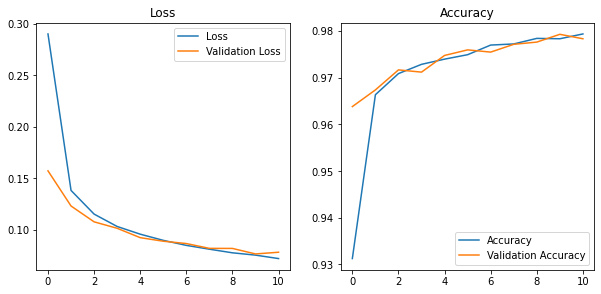

In [12]:
plot_train_val_accuracy_loss(best_for_layernums[0][1])
score = best_for_layernums[0][0].evaluate(test_images, test_labels, verbose=0)
print("Model 1:", best_for_layernums[0][2])
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))
loss_results.append(score[0])

Model 2: <keras.src.callbacks.History object at 0x0000028737D27A00>
Test Loss : 0.0916
Test Accuracy : 0.9736


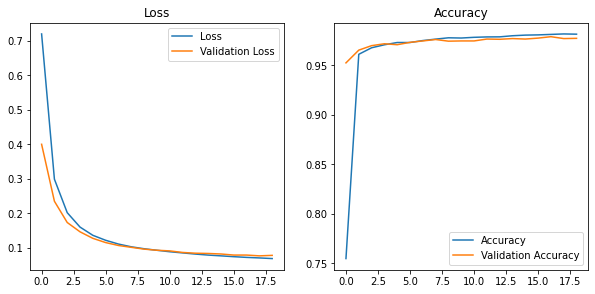

In [13]:
plot_train_val_accuracy_loss(best_for_layernums[1][1])
score = best_for_layernums[1][0].evaluate(test_images, test_labels, verbose=0)
print("Model 2:", best_for_layernums[1][2])
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))
loss_results.append(score[0])

Model 3: {'hidden_layers': 3, 'hidden_layers_neurons': (64, 64, 4), 'activation': <function relu at 0x000002872CDB75E0>, 'batch_size': 32, 'epochs': 30}
Test Loss : 0.0756
Test Accuracy : 0.9760


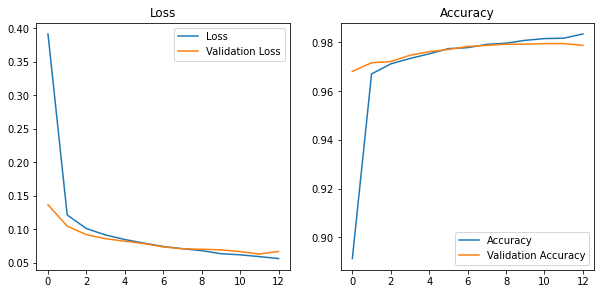

In [14]:
plot_train_val_accuracy_loss(best_for_layernums[2][1])
score = best_for_layernums[2][0].evaluate(test_images, test_labels, verbose=0)
print("Model 3:", best_for_layernums[2][2])
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))
loss_results.append(score[0])

Model 4(Best): {'hidden_layers': 3, 'hidden_layers_neurons': (64, 64, 4), 'activation': <function relu at 0x000002872CDB75E0>, 'batch_size': 32, 'epochs': 30}
Test Loss : 0.0756
Test Accuracy : 0.9760


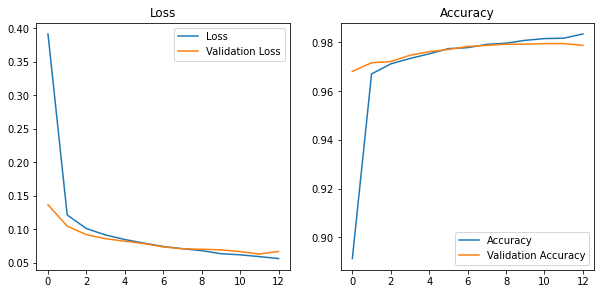

In [15]:
plot_train_val_accuracy_loss(best_history)
score = best_model.evaluate(test_images, test_labels, verbose=0)
print("Model 4(Best):", best_params)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))
loss_results.append(score[0])

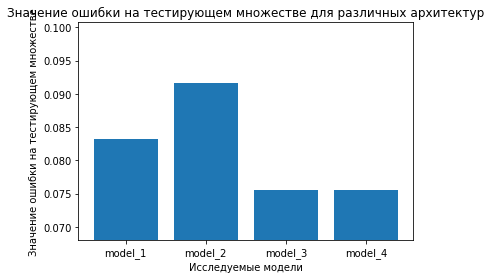

In [16]:
models_names = [f"model_{i}" for i in range(1, len(loss_results) + 1)]
plt.bar(models_names, loss_results)

plt.title('Значение ошибки на тестирующем множестве для различных архитектур')
plt.xlabel('Исследуемые модели')
plt.ylabel('Значение ошибки')

plt.ylim(min(loss_results) - min(loss_results)/10, max(loss_results) + max(loss_results)/10)

plt.show()

## Изменение алгоритма оптимизации

In [17]:
from keras import models
loss_results_2 = []
#params_2 = [{'hidden_layers': 1, 'hidden_layers_neurons': (64,), 'activation': relu, 'batch_size': 32, 'epochs': 30}, ]
params_2 = [best_for_layernums[0][2], best_for_layernums[1][2], best_for_layernums[2][2]]
for i in params_2:
    model = create_model(optimizer="adam", activation=i["activation"], hidden_layers=i["hidden_layers"], hidden_layers_neurons=i["hidden_layers_neurons"])
    model.fit(train_images, train_labels, epochs=i["epochs"], validation_data=(val_images, val_labels), callbacks=[early_stopping], batch_size=i["batch_size"])
    score = model.evaluate(test_images, test_labels, verbose=0)
    print('Test Loss : {:.4f}'.format(score[0]))
    print('Test Accuracy : {:.4f}'.format(score[1]))
    loss_results_2.append(score[0])

3
64
64
4
Epoch 1/30
394/394 [==============================] - 2s 3ms/step - loss: 0.1339 - accuracy: 0.9602 - val_loss: 0.0692 - val_accuracy: 0.9774
Epoch 2/30
394/394 [==============================] - 1s 3ms/step - loss: 0.0655 - accuracy: 0.9793 - val_loss: 0.0561 - val_accuracy: 0.9812
Epoch 3/30
394/394 [==============================] - 1s 3ms/step - loss: 0.0491 - accuracy: 0.9844 - val_loss: 0.0598 - val_accuracy: 0.9826
Test Loss : 0.0582
Test Accuracy : 0.9831
3
64
64
4
Epoch 1/30
394/394 [==============================] - 2s 3ms/step - loss: 0.1337 - accuracy: 0.9595 - val_loss: 0.0735 - val_accuracy: 0.9788
Epoch 2/30
394/394 [==============================] - 1s 3ms/step - loss: 0.0703 - accuracy: 0.9785 - val_loss: 0.0626 - val_accuracy: 0.9800
Epoch 3/30
394/394 [==============================] - 1s 3ms/step - loss: 0.0546 - accuracy: 0.9832 - val_loss: 0.0508 - val_accuracy: 0.9838
Epoch 4/30
394/394 [==============================] - 1s 3ms/step - loss: 0.0403 - acc

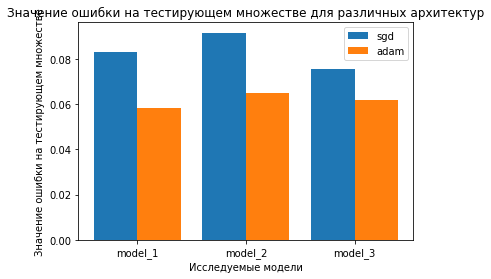

In [28]:
models_names = [f"model_{i}" for i in range(1, len(loss_results_2) + 1)]

X_axis = np.arange(len(models_names))

plt.bar(X_axis - 0.2, loss_results[:3], 0.4, label = 'sgd')
plt.bar(X_axis + 0.2, loss_results_2, 0.4, label = 'adam')

plt.xticks(X_axis, models_names)
plt.title('Значение ошибки на тестирующем множестве для различных архитектур')
plt.xlabel('Исследуемые модели')
plt.ylabel('Значение ошибки')
plt.legend()
plt.show()

## Добавление блоков batch-нормализации и dropout

Epoch 1/30
394/394 [==============================] - 3s 4ms/step - loss: 0.3630 - accuracy: 0.8972 - val_loss: 0.1305 - val_accuracy: 0.9712
Epoch 2/30
394/394 [==============================] - 1s 4ms/step - loss: 0.1926 - accuracy: 0.9459 - val_loss: 0.0965 - val_accuracy: 0.9731
Epoch 3/30
394/394 [==============================] - 1s 4ms/step - loss: 0.1448 - accuracy: 0.9594 - val_loss: 0.0723 - val_accuracy: 0.9805
Epoch 4/30
394/394 [==============================] - 1s 4ms/step - loss: 0.1412 - accuracy: 0.9575 - val_loss: 0.0558 - val_accuracy: 0.9817
Epoch 5/30
394/394 [==============================] - 1s 4ms/step - loss: 0.1200 - accuracy: 0.9628 - val_loss: 0.0595 - val_accuracy: 0.9833
Test Loss : 0.0718
Test Accuracy : 0.9802


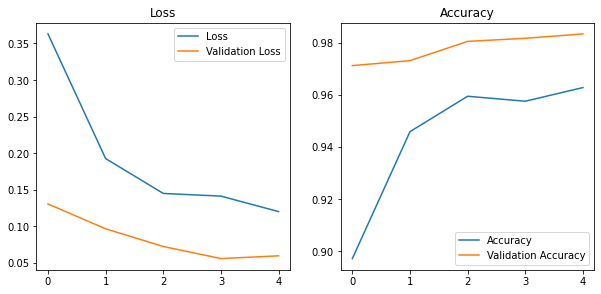

In [33]:
loss_results_3 = [loss_results[3]]
model_b_d = models.Sequential([
    layers.Flatten(input_shape = (28, 28, 1)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(4, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(3,activation = 'softmax')
])
model_b_d.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_d_b = model_b_d.fit(train_images, train_labels, epochs=30, validation_data=(val_images, val_labels), callbacks=[early_stopping], batch_size=32)
plot_train_val_accuracy_loss(history_d_b)
score = model_b_d.evaluate(test_images, test_labels, verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))
loss_results_3.append(score[0])

(0.06457536220550537, 0.08317716792225838)

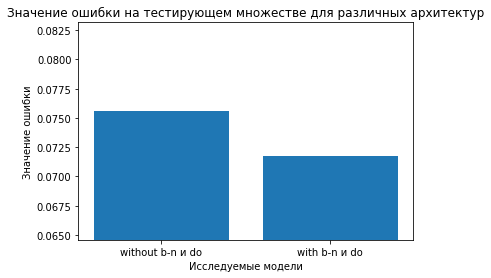

In [34]:
models_names = ["without b-n и do", "with b-n и do"]
plt.bar(models_names, loss_results_3)

plt.title('Значение ошибки на тестирующем множестве для различных архитектур')
plt.xlabel('Исследуемые модели')
plt.ylabel('Значение ошибки')


plt.ylim(min(loss_results_3) - min(loss_results_3)/10, max(loss_results_3) + max(loss_results_3)/10)

Text(0.5, 1.0, 'Accuracy')

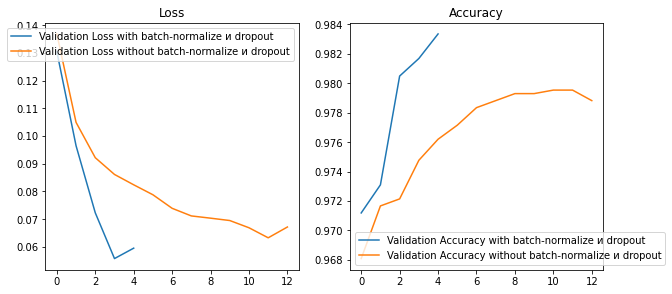

In [35]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history_d_b.history['val_loss'], label='Validation Loss with batch-normalize и dropout')
plt.plot(best_history.history['val_loss'], label='Validation Loss without batch-normalize и dropout')
plt.legend()
plt.title('Loss')

plt.subplot(2, 2, 2)
plt.plot(history_d_b.history['val_accuracy'], label='Validation Accuracy with batch-normalize и dropout')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy without batch-normalize и dropout')
plt.legend()
plt.title('Accuracy')